Tensorflow and CNN for Topic Classification

In [1]:
import pandas as pd

DATA_SET_FILE = './labeled_news.csv'

df = pd.read_csv(DATA_SET_FILE, header=None)

print(df[2])

0      President Donald Trump told Israeli Prime Mini...
1      President Donald Trump and Israeli Prime Minis...
2      "Tomorrow's world will be different -- and it ...
3      President Donald Trump told Israeli newspaper ...
4      President Trump hosts world leaders. Michael F...
5      Israel is at a crossroads: two states or not t...
6      Iowa Rep. Steve King says General Michael Flyn...
7      High-level advisers close to then-presidential...
8      Like parents around the country, Jeanette Vizg...
9      White House senior policy adviser Stephen Mill...
10     Andrew Puzder has withdrawn as President Donal...
11     Here are all the reasons Andy Puzder, Trump's ...
12     The ex-wife of Labor Secretary nominee Andy Pu...
13     Former national security adviser Michael Flynn...
14     The Defense Department might propose that the ...
15     Earmarks, the simultaneously hated and beloved...
16     The number of hate groups in America spiked in...
17     CNN's Jake Tapper discus

Statistics
Let's first take a look at our data from a statistics perspectice

In [2]:
print("class description")
print(df[0].describe())

print("""

===================

""")

print("source description")
print(df[3].describe())

class description
count    538.000000
mean       3.356877
std        2.094366
min        1.000000
25%        2.000000
50%        2.000000
75%        5.000000
max        8.000000
Name: 0, dtype: float64




source description
count     538
unique     11
top       cnn
freq      127
Name: 3, dtype: object


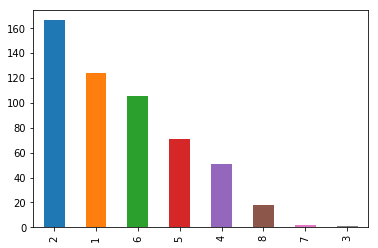

In [5]:
import matplotlib.pyplot as plt

plt.style.use = 'default'
df[0].value_counts().plot(kind="bar")

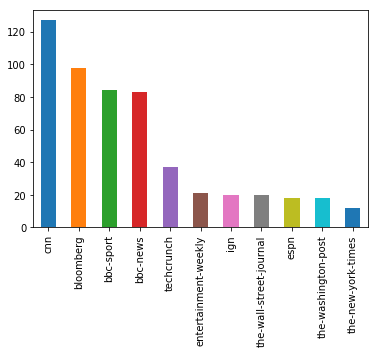

In [4]:
df[3].value_counts().plot(kind="bar")

Vocabulary Preprocessing

In [9]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
from nltk.tokenize import word_tokenize

sentence = "I like apple, but I hate apple juice."

print(word_tokenize(sentence))

['I', 'like', 'apple', ',', 'but', 'I', 'hate', 'apple', 'juice', '.']


Stopwords

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

{'on', 'be', 'll', 'shouldn', 'him', 'his', 'any', 'each', 've', "hasn't", 'over', 'weren', 'am', 'her', 'can', 'didn', 'aren', "you're", "don't", 'below', 'doesn', 'but', 'having', 'doing', "didn't", 'down', 'at', 'being', 'or', 'just', 'have', 'ma', 'were', 'between', 'after', 'hasn', 'she', 'wasn', 'of', 't', 'during', 'nor', 'which', "it's", 'very', 'should', 'don', 'to', 'theirs', 'once', 'hers', 'mustn', 'our', 'himself', 'out', 'no', 'other', "she's", 'too', 'more', "mightn't", 'then', "hadn't", 'hadn', 'them', 'now', 'if', 'was', 'myself', 'mightn', 'me', 'off', 'yourself', 'o', 'those', 'do', 'herself', 'with', "you'd", 'when', 'up', "needn't", 'i', "wouldn't", 'does', 'it', 'been', 'won', 'ourselves', 'is', "wasn't", 'for', 'he', 'only', "doesn't", 'as', "shouldn't", 'isn', 'some', 'ours', 'from', 'had', 'own', 'they', "haven't", 'you', 'than', 'where', 'such', 'through', 'how', 'needn', 'same', 'against', 'most', "should've", "shan't", 'has', 'under', "you'll", 'further', 'y

Stemming

In [1]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import PorterStemmer as SnowballStemmer

lancaster_stemmer = LancasterStemmer()
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer()

words = ["fishing", "fished", "fisher", "fishes"]
print([lancaster_stemmer.stem(w.lower()) for w in words])
print([porter_stemmer.stem(w.lower()) for w in words])
print([snowball_stemmer.stem(w.lower()) for w in words])

['fish', 'fish', 'fish', 'fish']
['fish', 'fish', 'fisher', 'fish']
['fish', 'fish', 'fisher', 'fish']


In [4]:
import numpy as np
import tensorflow as tf

MAX_DOCUMENT_LENGTH = 5

vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)

# fit and transform
sentences = [
    "I like apple",
    "I like banana",
    "I eat apple"
]

embedded_sentences = np.array(list(vocab_processor.fit_transform(sentences)))
print(embedded_sentences)

print("Total unique words: %d" % len(vocab_processor.vocabulary_))

print("")
# just fit: unseen words will be interpreted as 0
new_sentences = [
    "This is a brand new sentence which we never seen before and is very long",
    "I hate doing homework!",
    "I like banana",
    "I eat apple"
]

new_embedded_sentences = np.array(list(vocab_processor.transform(new_sentences)))
print(new_embedded_sentences)

[[1 2 3 0 0]
 [1 2 4 0 0]
 [1 5 3 0 0]]
Total unique words: 6

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 2 4 0 0]
 [1 5 3 0 0]]


One-hot Embedding

In [5]:
import tensorflow as tf
vocab_size = 6
embed_dim = 3

sentences = [
    [1, 2, 3, 0, 0]
]
embedded_sentences = tf.contrib.layers.embed_sequence(sentences, vocab_size, embed_dim)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(embedded_sentences)
    print(result)

[[[-0.5689086  -0.401286    0.45562935]
  [-0.18519092 -0.7141741   0.24426758]
  [ 0.6613276  -0.12695271 -0.746861  ]
  [ 0.47960234  0.01168376  0.47433376]
  [ 0.47960234  0.01168376  0.47433376]]]


Convolutional Neural Networks (CNN)

In [11]:
# -*- coding: utf-8 -*-

import numpy as np
import os
import pandas as pd
import pickle
import shutil
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn import metrics

learn = tf.contrib.learn

DATA_SET_FILE = './labeled_news.csv'

MAX_DOCUMENT_LENGTH = 500
N_CLASSES = 8

EMBEDDING_SIZE = 100
N_FILTERS = 10
WINDOW_SIZE = 10
FILTER_SHAPE1 = [WINDOW_SIZE, EMBEDDING_SIZE]
FILTER_SHAPE2 = [WINDOW_SIZE, N_FILTERS]
POOLING_WINDOW = 4
POOLING_STRIDE = 2

LEARNING_RATE = 0.01
STEPS = 50 # Set a small number for demonstration purpose.

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def generate_cnn_model(n_classes, n_words):
    """2 layers CNN to predict from sequence of words to a class."""
    def cnn_model(features, target):
        # Convert indexes of words into embeddings.
        # This creates embeddings matrix of [n_words, EMBEDDING_SIZE] and then
        # maps word indexes of the sequence into [batch_size, sequence_length,
        # EMBEDDING_SIZE].

        target = tf.one_hot(target, n_classes, 1, 0)
        word_vectors = tf.contrib.layers.embed_sequence(
            features, vocab_size=n_words, embed_dim=EMBEDDING_SIZE, scope='words')

        word_vectors = tf.expand_dims(word_vectors, 3)
        
        with tf.variable_scope('CNN_layer1'):
            # Apply Convolution filtering on input sequence.
            conv1 = tf.contrib.layers.convolution2d(
                word_vectors, N_FILTERS, FILTER_SHAPE1, padding='VALID')
            # Add a RELU for non linearity.
            conv1 = tf.nn.relu(conv1)
            # Max pooling across output of Convolution+Relu.
            pool1 = tf.nn.max_pool(
                conv1,
                ksize=[1, POOLING_WINDOW, 1, 1],
                strides=[1, POOLING_STRIDE, 1, 1],
                padding='SAME')
            # Transpose matrix so that n_filters from convolution becomes width.
            pool1 = tf.transpose(pool1, [0, 1, 3, 2])
      
        with tf.variable_scope('CNN_layer2'):
            # Second level of convolution filtering.
            conv2 = tf.contrib.layers.convolution2d(
                pool1, N_FILTERS, FILTER_SHAPE2, padding='VALID')
            # Max across each filter to get useful features for classification.
            pool2 = tf.squeeze(tf.reduce_max(conv2, 1), squeeze_dims=[1])

        # Apply regular WX + B and classification.
        logits = tf.contrib.layers.fully_connected(pool2, n_classes, activation_fn=None)
        loss = tf.contrib.losses.softmax_cross_entropy(logits, target)

        train_op = tf.contrib.layers.optimize_loss(
          loss,
          tf.contrib.framework.get_global_step(),
          optimizer='Adam',
          learning_rate=LEARNING_RATE)

        return ({
          'class': tf.argmax(logits, 1),
          'prob': tf.nn.softmax(logits)
        }, loss, train_op)

    return cnn_model


def main(unused_argv):
    # Prepare training and testing data
    df = pd.read_csv(DATA_SET_FILE, header=None)

    # Random shuffle
    df.sample(frac=0.2)

    train_df = df[0:80]
    test_df = df.drop(train_df.index)

    # x - news description, y - class
    x_train = train_df[2]
    y_train = train_df[0]
    x_test = test_df[2]
    y_test = test_df[0]

    # tokenize sentences
    x_train = [word_tokenize(sentence) for sentence in x_train.tolist()]
    x_test = [word_tokenize(sentence) for sentence in x_test.tolist()]

    # Stemming words.
    norm_x_train = []
    norm_x_test = []
    for tokens in x_train:
        stemmed_tokens = [stemmer.stem(w.lower()) for w in tokens if not w in stop_words]
        norm_sentence =  ' '.join(stemmed_tokens)
        norm_x_train.append(norm_sentence)

    for tokens in x_test:
        stemmed_tokens = [stemmer.stem(w.lower()) for w in tokens if not w in stop_words]
        norm_sentence =  ' '.join(stemmed_tokens)
        norm_x_test.append(norm_sentence)

    x_train = norm_x_train
    x_test = norm_x_test

    # Process vocabulary
    vocab_processor = learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
    x_train = np.array(list(vocab_processor.fit_transform(x_train)))
    x_test = np.array(list(vocab_processor.transform(x_test)))

    n_words = len(vocab_processor.vocabulary_)
    print('Total words: %d' % n_words)
  
    # Build model
    classifier = learn.Estimator(
        model_fn=generate_cnn_model(N_CLASSES, n_words))

    # Train and predict
    classifier.fit(x_train, y_train, steps=STEPS)

    # Evaluate model
    y_predicted = [
        p['class'] for p in classifier.predict(x_test, as_iterable=True)
    ]
    print(y_predicted)

    score = metrics.accuracy_score(y_test, y_predicted)
    print('Accuracy: {0:f}'.format(score))

if __name__ == '__main__':
    tf.app.run(main=main)

Total words: 859
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117e91f98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zh/rzqtmjjj6z9b42913x99fcrh0000gn/T/tmp7zqdvwmg'}
Instruc

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/zh/rzqtmjjj6z9b42913x99fcrh0000gn/T/tmp7zqdvwmg/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 6, 6, 1, 1, 1, 2, 2, 1, 1, 6, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 2, 2, 1, 1, 2, 6, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 6, 6, 6, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 6, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 6, 1, 1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 4, 4, 1, 1, 4, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 1, 1, 2, 1, 1, 1, 2, 

SystemExit: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
